<a href="https://colab.research.google.com/gist/alloypiedmont/b8bb6ab976fb918013ec1bcbcfe14862/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pens and Printers: Evaluating Sales Strategies

We have been tasked with evaluating the effectiveness of three sales strategies for promoting our new line of office stationery: emails, phone calls, and a combination of emails and phone calls. The goal is to determine which method yields the highest sales and to uncover any key differences between these approaches that could explain their performance. This analysis will provide actionable insights to guide future sales and marketing decisions.

# Data Validation
## The data validation process involved thoroughly checking for duplicates, addressing missing values, confirming logical consistency to ensure correct data entered, and correcting issues like misspellings. The dataset consists of 15,000 rows and 8 columns. Below is a detailed breakdown of how each column was validated, cleaned, and transformed:

1. **State**
Data Type: character (chr)
The state column contained 50 distinct values for which states from which the orders originated, matching the description. The values in this column were accurate, with no misspellings or missing data. No cleaning was necessary here.

2. **Week**
Data Type: numeric (num).
The week column had 6 distinct values ranging from 1 to 6, showing how many weeks after launch the purchase was made, which matches the description. Validation confirmed the data was accurate, with no missing values and no cleaning was required.

3. **Customer ID**
Data Type: character (chr).
The customer_id column contained 15,000 distinct values, with no missing entries or duplicates. This column matched the description, acting as a unique identifier for each customer who made a purchase. No cleaning neccessary.

4. **Number of Products Sold (nb_sold)**
Data Type: numeric (num).
The nb_sold column had 10 distinct values, ranging from 7 to 16 new items sold per purchase. This aligns with the description. There was no missing data and validation confirmed the data’s integrity, so no cleaning was necessary.

5. **Number of Site Visits (nb_site_visits)**
Data Type: numeric (num).
The nb_site_visits column contained 27 distinct values, ranging from 12 to 41 site visits, with no missing entries or inappropriate duplicates. The data was accurate, matched the description, and required no cleaning.

6. **Years as a Customer (years_as_customer)**
Data Type: numeric (num).
The years_as_customer column had 42 distinct values, ranging from 0 to 63 years as a customer, with no missing entries or inappropriate duplicates. However, as Pens and Printers has only been open since 1984 (40 years ago), there were two inappropriate values in this column where these values showed that customers have been buying from Pens and Printers for longer than the store has existed. To rectify this, values that exceeded the number of years Pens and Printers have been open were replaced with 40 years.

7. **Sales Method (sales_method)**
Data Type: character (chr).
The sales_method column initially contained five distinct values: 'Email', 'Email + Call', 'Call', 'em + call', and 'email'. The entries 'email' and 'em + call' were inconsistent with the expected categories. Using the mutate() function, 'email' was standardized to 'Email' and 'em + call' to 'Email + Call', reducing the column to three distinct values: 'Email', 'Email + Call', and 'Call'.

8. **Revenue**
Data Type: numeric (num).
This column outlined the revenue from the sales, rounded to two decimal points, which aligns with the description. The revenue values ranged from \$32.54 \to $238.32. The revenue column had 1,074 (7.16%) missing values. To address the missing values without distorting the data, the missing values were removed to ensure high quality data, since it was a relatively small amount and still leaves us with 13,926 values of data to work with.

## After the validation, cleaning, and transformation process, the dataframe was renamed cleaned_data. The final dataset ends up with 13,926 rows and 8 columns, with all issues addressed systematically.

In [1]:
install.packages(c("tidyverse"))
library(tidyverse)

url <- "https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv"
data <- read_csv(url)

str(data)
summary(data)

#This step was loading all the required packages and get familiar with the data.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 15000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sales_method, customer_id, state
dbl (5): week, nb_sold, revenue, years_as_customer, nb_site_visits

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [15,000 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ week             : num [1:15000] 2 6 5 4 3 6 4 1 5 5 ...
 $ sales_method     : chr [1:15000] "Email" "Email + Call" "Call" "Email" ...
 $ customer_id      : chr [1:15000] "2e72d641-95ac-497b-bbf8-4861764a7097" "3998a98d-70f5-44f7-942e-789bb8ad2fe7" "d1de9884-8059-4065-b10f-86eef57e4a44" "78aa75a4-ffeb-4817-b1d0-2f030783c5d7" ...
 $ nb_sold          : num [1:15000] 10 15 11 11 9 13 11 10 11 11 ...
 $ revenue          : num [1:15000] NA 225.5 52.5 NA 90.5 ...
 $ years_as_customer: num [1:15000] 0 1 6 3 0 10 9 1 10 7 ...
 $ nb_site_visits   : num [1:15000] 24 28 26 25 28 24 28 22 31 23 ...
 $ state            : chr [1:15000] "Arizona" "Kansas" "Wisconsin" "Indiana" ...
 - attr(*, "spec")=
  .. cols(
  ..   week = col_double(),
  ..   sales_method = col_character(),
  ..   customer_id = col_character(),
  ..   nb_sold = col_double(),
  ..   revenue = col_double(),
  ..   years_as_customer = col_double(),
  ..   nb_site_visits

      week       sales_method       customer_id           nb_sold     
 Min.   :1.000   Length:15000       Length:15000       Min.   : 7.00  
 1st Qu.:2.000   Class :character   Class :character   1st Qu.: 9.00  
 Median :3.000   Mode  :character   Mode  :character   Median :10.00  
 Mean   :3.098                                         Mean   :10.08  
 3rd Qu.:5.000                                         3rd Qu.:11.00  
 Max.   :6.000                                         Max.   :16.00  
                                                                      
    revenue       years_as_customer nb_site_visits     state          
 Min.   : 32.54   Min.   : 0.000    Min.   :12.00   Length:15000      
 1st Qu.: 52.47   1st Qu.: 1.000    1st Qu.:23.00   Class :character  
 Median : 89.50   Median : 3.000    Median :25.00   Mode  :character  
 Mean   : 93.93   Mean   : 4.966    Mean   :24.99                     
 3rd Qu.:107.33   3rd Qu.: 7.000    3rd Qu.:27.00                     
 Max. 

In [ ]:
data %>%
  count(sales_method)

cleaned_data <- data %>%
  mutate(
    sales_method = case_when(
      str_to_lower(sales_method) == "email" ~ "Email",
      str_to_lower(sales_method) %in% c("email + call", "em + call", "email +call") ~ "Email + Call",
      str_to_lower(sales_method) == "call" ~ "Call",
      TRUE ~ sales_method
    )
  )

cleaned_data %>%
  count(sales_method)

#Cleaning up the sales_method column so that instead of having 5 different inputs that were simply different spellings of the same information, we only had the original 3 that we were supposed to have. I stored this as cleaned_data.

sales_method n   
1 Call         4962
2 Email        7456
3 Email + Call 2549
4 em + call      23
5 email          10

sales_method n   
1 Call         4962
2 Email        7466
3 Email + Call 2572

In [ ]:
cleaned_data <- cleaned_data %>%
  filter(!is.na(revenue))

# Replacing the NA values with median revenue values.

sum(is.na(cleaned_data$revenue))

# This should return 0; validating I implemented the code correctly.

cleaned_data %>%
summarize(total_rows = n())

max_years <- 40

cleaned_data <- cleaned_data %>%
  mutate(years_as_customer = ifelse(years_as_customer > max_years, max_years, years_as_customer))

# Cleaning the years as customers data, since two values were showing that they had been customers for longer than the company had even been open.

[1] 0

total_rows
1 13926

# Exploratory Analysis

## Overview of Graphics

**Histogram of Revenue:**
The histogram illustrates the overall distribution of revenue, which is right-skewed (positively skewed). The bimodailty of the histogram shows the presence of two distinct groups: lower-cost and high-cost purchases, likely corresponding to the different product categories (for example, pens would be lower-cost whereas printers woyld be more expensive). The long tail to the right highlights the presence of outliers, suggesting a few big spenders significantly impacted the data. Most buyers spent between \$52.47 and \$107.33, as indicated by the histogram.

**Bar Graph of Sales per Week:**
This graph shows that sales were highest during the first week of the campaign and exhibited a downward trend in subsequent weeks.

**Line Graph of Sales by Method:**
While total sales declined over the trial period, this trend differed across sales methods:
- Call Only: Started low, increased steadily over the first five weeks, then dropped sharply in the final week.
- Email Only: Began with very high sales but tapered off gradually over time.
- Email + Call: Had low initial sales, which increased steadily until a slight drop in the final week.
These trends indicate that the Email Only method was effective early on but less sustainable, while Email + Call gained momentum over time, showing long-term potential.

**Boxplot of Revenue by Sales Method:**
The boxplot reveals the distribution of revenue by each sales method. Email + Call generated the highest median and mean revenue, making it the most effective strategy in terms of per-customer revenue.

**Bar Graph of Sales Filled by Sales Method:**
This graph, combined with the boxplot, highlights key insights:
- Email Only had the most total sales but lower revenue per sale.
- Email + Call had fewer total sales but higher revenue per customer, indicating its strong impact among those who made purchases.
- Call Only achieved more sales than Email + Call but had the lowest overall revenue.

**Pie Chart of Overall Sales:**
The pie chart illustrates the proportion of overall sales contributed by each sales method. Email accounted for the largest share with 6,922 sales, followed by Calls with 4,781 sales, and Email + Call with 2,223 sales.

# Key Takeaways
## Revenue Performance:
- Email + Call generated the most revenue, followed by Email, with Call Only in last place.
Sales Trends Over Time:
- Email Only: Strong start but rapid decline.
- Email + Call: Gradual increase over time, with slight drop-off at the end.
- Call Only: Steady growth initially, followed by a sharp decline in the final week.
## Number of Items Sold:
Email Only sold the most items.
Call Only sold fewer items than Email but more than Email + Call.
Email + Call sold the least but had the highest revenue per sale.

# Business Metrics

## A potential metric to track sales effectiveness over time is median revenue per customer based on the sales group. Based on the current data:

- Call Only: $49.10
- Email Only: $95.60
- Email + Call: $185.00

Tracking the median revenue per customer would be an effective metric since it focuses on individual customer behavior, allows for fair comparison across sales methods, and provides actionable insights over time. It is particularly useful in scenarios with skewed data distributions (such as ours) and complements broader revenue metrics to form a complete performance picture.

## Summation and Recommendations

1. **Focus on the Email + Call Strategy:**
While it had fewer total sales, it generated the highest revenue per customer and showed growth over time. This makes it the most effective long-term strategy. It does take ~10 minutes longer than just sending the emails, but is projected to have longer-term success for slightly more time investment.
2. **Refine the Email-Only Approach:**
Despite its strong start, the Email method struggled to sustain momentum.
3. **Reevaluate the Call-Only Method:**
The Call method achieved decent sales volume but underperformed in revenue. Call-only performed the lowest and took the most time (~30 minutes per call) I do not reccomend continuing with the call-only approach.

These insights provide a clear path for optimizing marketing strategies to maximize revenue and sustain customer engagement over time.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


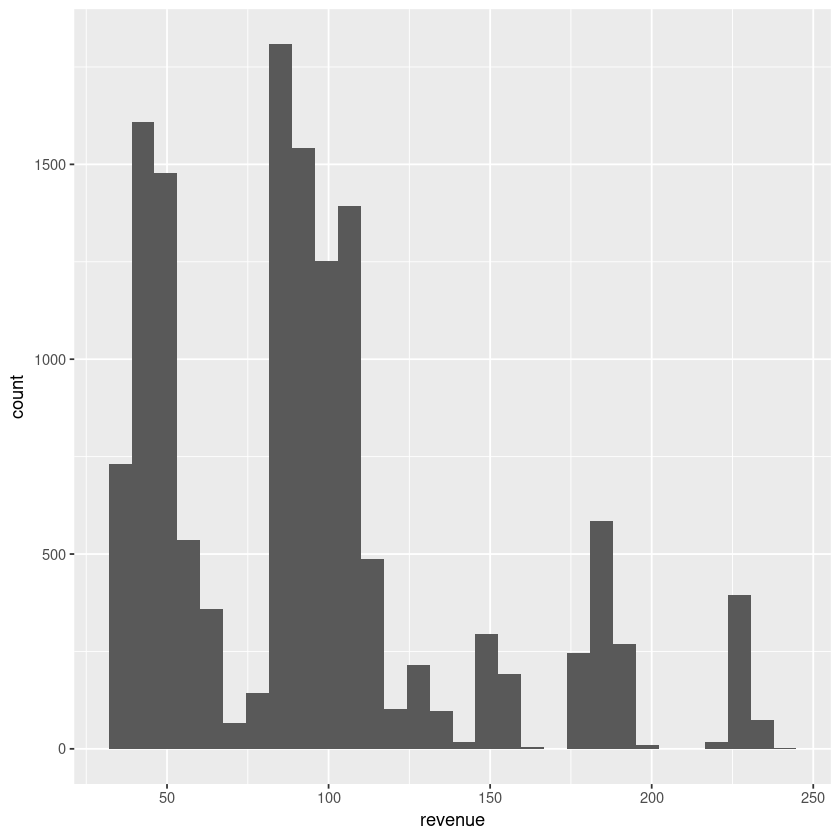

In [ ]:
ggplot(cleaned_data, aes(revenue)) +
	geom_histogram()

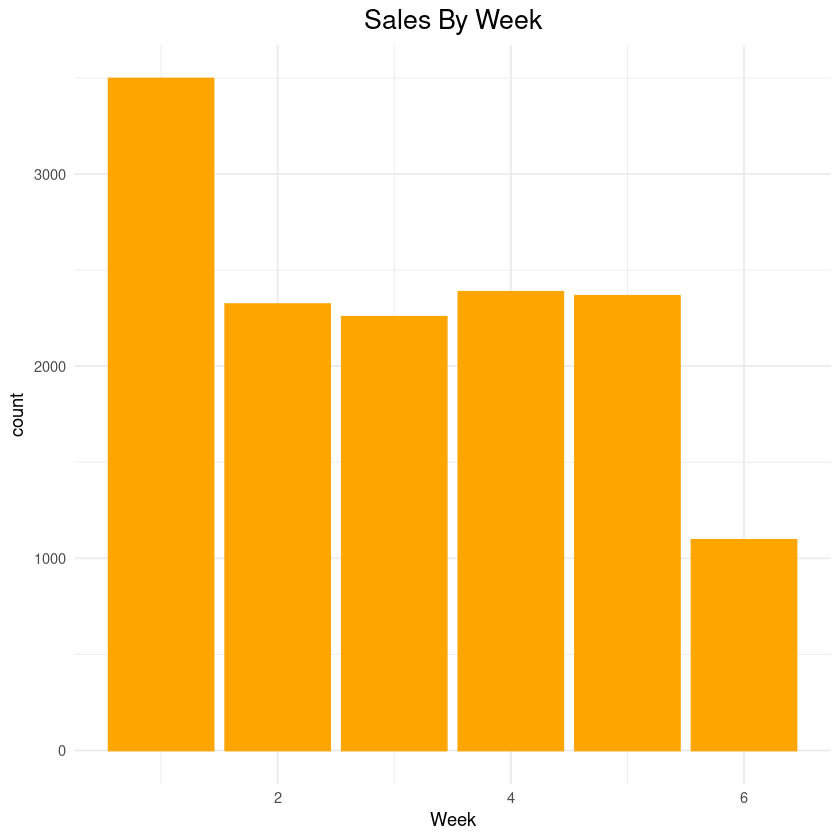

In [ ]:
ggplot(cleaned_data, aes(week)) +
	geom_bar(fill = "orange", color = "orange") +
	labs(title = "Sales By Week", x = "Week") +
	theme_minimal() +
	theme(plot.title = element_text(size = 16, hjust = 0.5))

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


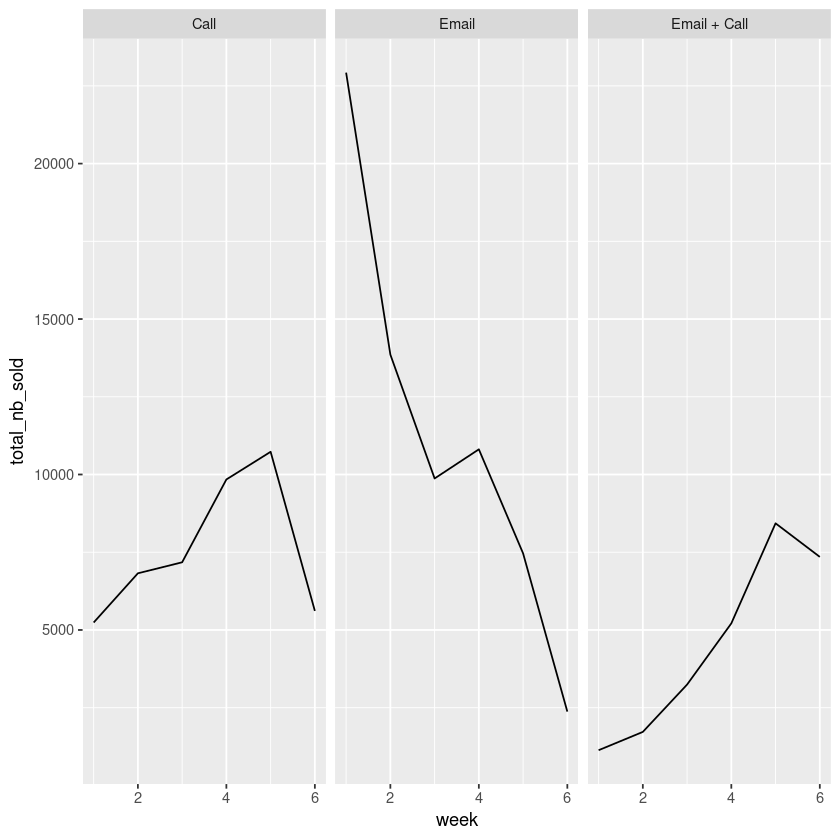

In [ ]:
weekly_totals <- cleaned_data %>%
	group_by(week, sales_method) %>%
	summarize(total_nb_sold = sum(nb_sold))

ggplot(weekly_totals, aes(week, total_nb_sold)) +
	geom_line() +
	facet_wrap(~sales_method)

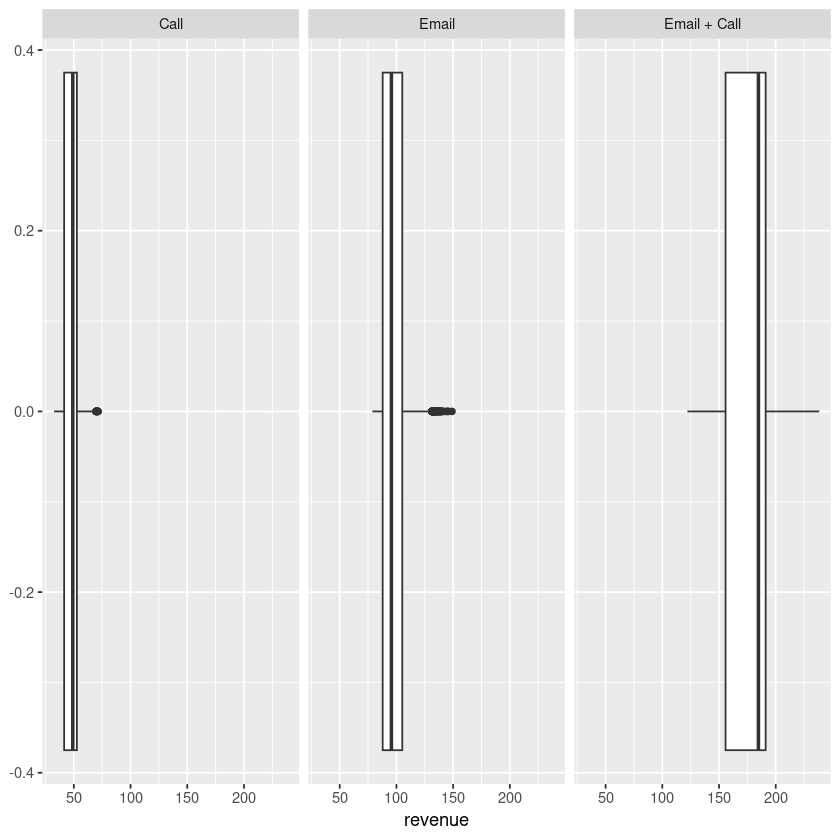

In [ ]:
ggplot(cleaned_data, aes(revenue)) +
	geom_boxplot() +
	facet_wrap(~ sales_method)

#Getting a sense of the data distribution for each sales methods

In [ ]:
cus_per_method <- cleaned_data %>%
	group_by(sales_method) %>%
	summarize(total_customers = n_distinct(customer_id))

cus_per_method

sales_method total_customers
1 Call         4781           
2 Email        6922           
3 Email + Call 2223

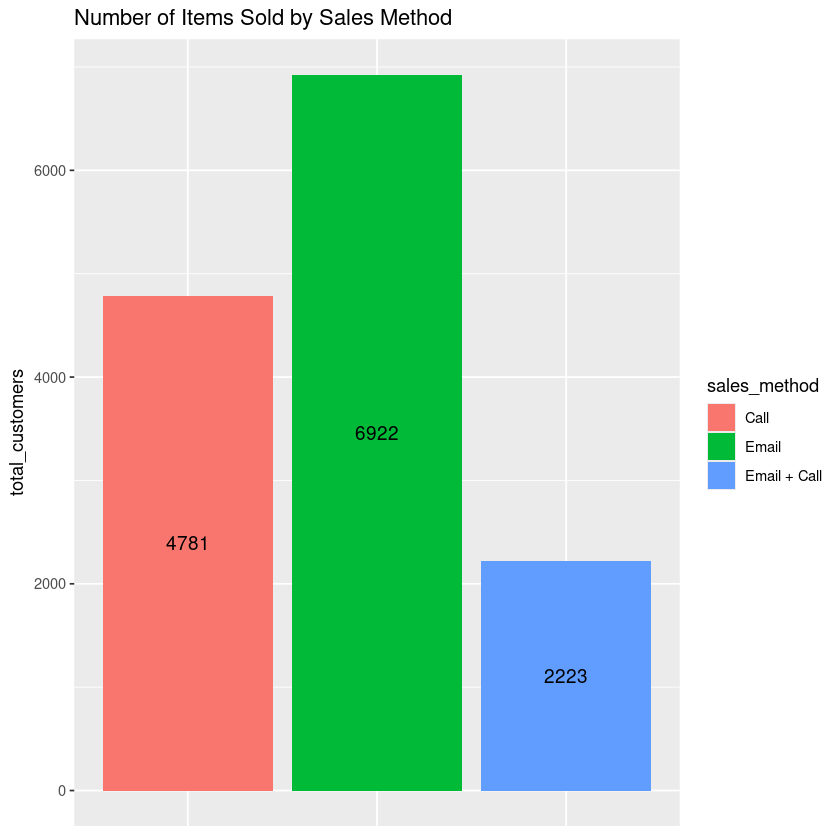

In [ ]:
ggplot(cus_per_method, aes(x = sales_method, y = total_customers, fill = sales_method)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_customers),
            position = position_stack(vjust = 0.5),
            color = "black",
            size = 4) +
  labs(
    x = NULL,
    title = "Number of Items Sold by Sales Method"
  ) +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

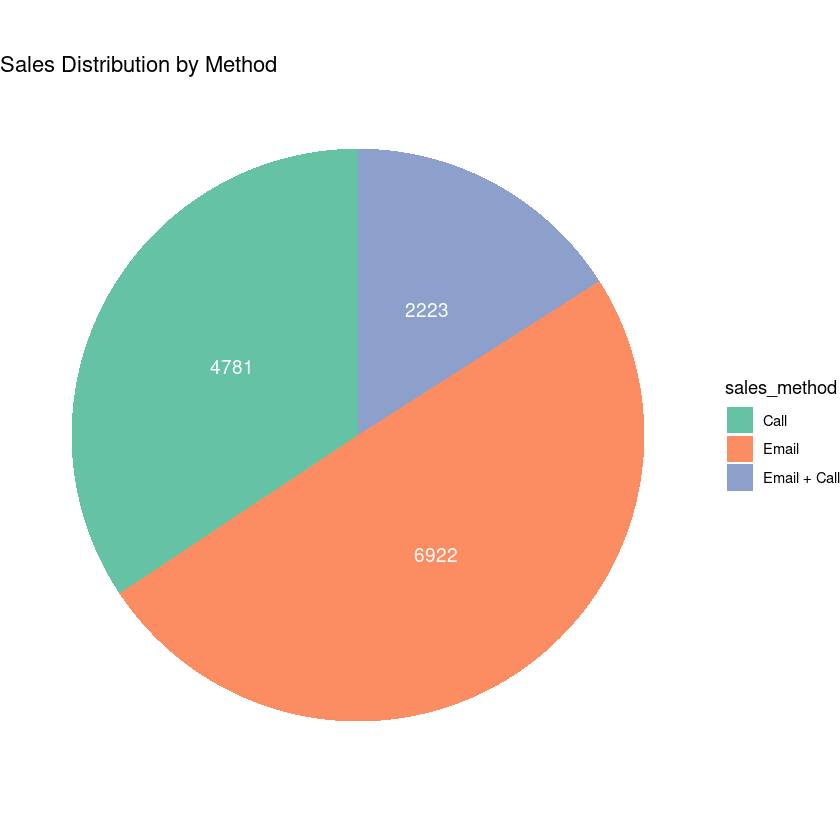

In [ ]:
ggplot(cus_per_method, aes(x = "", y = total_customers, fill = sales_method)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = total_customers),
            position = position_stack(vjust = 0.5),
            color = "white",
            size = 4) +
  labs(title = "Sales Distribution by Method", x = NULL, y = NULL) +
  theme_void() +
  scale_fill_brewer(palette = "Set2")

# Code Used for Analysis
## Below is the R code used to clean the data, conduct exploratory analysis, and generate the visualizations included in this report.

In [ ]:
head(data)
tail(data)
#Getting more familiar with the data still...

week sales_method customer_id                          nb_sold revenue
1 2    Email        2e72d641-95ac-497b-bbf8-4861764a7097 10          NA 
2 6    Email + Call 3998a98d-70f5-44f7-942e-789bb8ad2fe7 15      225.47 
3 5    Call         d1de9884-8059-4065-b10f-86eef57e4a44 11       52.55 
4 4    Email        78aa75a4-ffeb-4817-b1d0-2f030783c5d7 11          NA 
5 3    Email        10e6d446-10a5-42e5-8210-1b5438f70922  9       90.49 
6 6    Call         6489e678-40f2-4fed-a48e-d0dff9c09205 13       65.01 
  years_as_customer nb_site_visits state      
1  0                24             Arizona    
2  1                28             Kansas     
3  6                26             Wisconsin  
4  3                25             Indiana    
5  0                28             Illinois   
6 10                24             Mississippi

week sales_method customer_id                          nb_sold revenue
1 4    Email        56f02e26-3633-427d-8c4e-f45f00afa787 11      109.36 
2 4    Call         17267b41-d048-4346-8b90-7f787690a836 10       50.82 
3 5    Call         09e10d6f-4508-4b27-895e-4db11ce8302b 10       52.33 
4 1    Call         839653cb-68c9-48cb-a097-0a5a3b2b298b  7       34.87 
5 6    Call         e4dad70a-b23b-407c-8bd3-e32ea00fae17 13       64.90 
6 5    Email + Call 4e077235-7c17-4054-9997-7a890336a214 13          NA 
  years_as_customer nb_site_visits state        
1 3                 25             Ohio         
2 0                 22             Pennsylvania 
3 1                 27             Kansas       
4 4                 22             West Virginia
5 2                 27             New Jersey   
6 4                 25             Illinois

In [ ]:
data %>%
  select(state) %>%
  distinct()
#Validating the state column and make sure there are no misspellings, inconsistencies, etc.

state         
1  Arizona       
2  Kansas        
3  Wisconsin     
4  Indiana       
5  Illinois      
6  Mississippi   
7  Georgia       
8  Oklahoma      
9  Massachusetts 
10 Missouri      
11 Texas         
12 New York      
13 Maryland      
14 California    
15 Tennessee     
16 Pennsylvania  
17 North Dakota  
18 Florida       
19 Michigan      
20 North Carolina
21 Hawaii        
22 Colorado      
23 Louisiana     
24 Virginia      
25 New Mexico    
26 Arkansas      
27 Alaska        
28 Oregon        
29 New Hampshire 
30 Ohio          
31 New Jersey    
32 Connecticut   
33 Iowa          
34 Montana       
35 Washington    
36 Kentucky      
37 Alabama       
38 Nebraska      
39 South Carolina
40 Minnesota     
41 South Dakota  
42 Delaware      
43 Maine         
44 Utah          
45 West Virginia 
46 Vermont       
47 Rhode Island  
48 Nevada        
49 Idaho         
50 Wyoming

In [ ]:
data %>%
  count(week) %>%
  distinct()

data %>%
  count(customer_id) %>%
  distinct()

data %>%
  count(nb_sold) %>%
  distinct()

data %>%
  count(nb_site_visits) %>%
  distinct()

data %>%
  count(years_as_customer) %>%
  distinct()

cleaned_data %>%
	count(years_as_customer) %>%
	distinct()

week n   
1 1    3721
2 2    2491
3 3    2411
4 4    2575
5 5    2574
6 6    1228

customer_id                          n
1     00019f95-cd18-4a2a-aa62-512cc6b17ac5 1
2     00020b38-1ebb-427f-88d1-c60f3c426cfe 1
3     0002aed1-1a1f-4b20-845f-7a4b8cc9977a 1
4     00058065-ed47-4bc0-b74e-6803d0b67644 1
5     0011e7a6-9bda-4624-a115-f39866330cc8 1
6     001552ae-b76e-4070-b01b-b257c3383d8e 1
7     00169f03-bc6a-4944-b381-97a0eb1090b7 1
8     00180527-3248-43ad-8c4d-2cecf1e0c4b4 1
9     001e11a7-38cd-4772-bc28-d152756c7f45 1
10    00254aaf-1c92-4a98-9ff3-96068fa38fea 1
11    0026e9d7-d9fb-44e7-b0e8-b6f4884bf955 1
12    0029cf18-2280-4cfd-bec7-9dced67adc36 1
13    002bac19-ad17-474a-8dad-e54249e3a63a 1
14    002c1b11-040a-4c65-92ea-ea6cc7bce116 1
15    002fa9c8-3045-487f-8f28-9593e64d15cc 1
16    003deff2-015a-484b-9a21-4e40f3dc0964 1
17    003fc24c-bac7-4be1-9aac-0236b494d4b3 1
18    00404e38-7b7f-4fc6-ab9f-f12355b0c107 1
19    00518ca9-8100-4025-81fd-cf61304218b0 1
20    00534fbc-cc75-4407-ae2b-1d773a10730e 1
21    005a95c4-9f50-49d2-8ec3-5ad305b60541 1
22    005b4131-873d-4c37-9052-7756171715f3 1
23    005db774-8105-4547-b810-3908b46bae2b 1
24    00624f62-d186-4ef5-90bd-ca0e1d3564e6 1
25    0067eec6-f570-4264-a70d-5c5f1ef2c697 1
26    006818c5-88ba-48e4-98a7-523a65b5f94a 1
27    00694a03-adc9-46ef-ad81-39a77443e0c7 1
28    006c4658-129a-4697-8c4b-1eafcc4c5224 1
29    006e9665-d6cf-43aa-a363-418c40a6e529 1
30    006ed923-c6c2-4595-bd19-031ee2e8fc62 1
⋮     ⋮                                    ⋮
14971 ff69600c-47ca-49de-b832-3bfe578d8a5f 1
14972 ff72a418-dc4f-49b0-9201-3a73c003eec4 1
14973 ff73c670-ab91-4259-bfb2-4d4d384c40f7 1
14974 ff75290f-d04c-4295-9a3f-5f49b337a2ad 1
14975 ff78725a-9e05-47aa-8c57-85184d7866a8 1
14976 ff7e1b9b-f22a-493b-ad55-7647558890f9 1
14977 ff7f8158-0e17-4641-bbb8-f7da3e6b6f70 1
14978 ff8e962b-04f0-4ff1-98db-50e4de291c72 1
14979 ff9f63bb-c98e-4175-a4e5-25a4a4f0bf47 1
14980 ffa0d762-49b2-40a3-9665-c813a22e61a1 1
14981 ffa14742-89df-446d-aba5-f8efa550bebd 1
14982 ffa85047-d850-4378-9ab9-8f764a93f03c 1
14983 ffac633b-9dfe-43c3-a890-caecdf179a33 1
14984 ffb1a80c-786b-49e9-9c99-0069d2d30fd6 1
14985 ffb2ba89-c195-4cc4-b301-ada1409c653f 1
14986 ffb99cbe-b96d-4c2d-a36a-c2b4ab3b2aeb 1
14987 ffc242cb-bb01-4aab-8441-731cb03b742f 1
14988 ffc3d42a-1e94-45a8-ad2f-efe32c170074 1
14989 ffc7e39d-389b-404a-9e90-692268da5de4 1
14990 ffd343bc-e71d-4d79-9c9f-aac0b9351e84 1
14991 ffd6bc4b-3753-4de1-980e-303c5e31dca0 1
14992 ffdb35c0-2d7e-4a86-bb56-85a20513cd95 1
14993 ffe0af40-3bc6-4817-b5d4-5620eedbc11d 1
14994 ffe10ed7-4439-467a-a8c6-1d4ffb92f42b 1
14995 ffe8abd8-e941-4d9f-91b3-2aa9e029f62b 1
14996 fff2ac99-1300-4a02-8aa0-ce6440f7ce6f 1
14997 fff7398c-87d7-4baa-844c-a93da3d78454 1
14998 fff8d038-8306-46a6-8c12-e1416e0dd978 1
14999 fffc2b37-eb7f-40fe-91d6-632b0a3ecc36 1
15000 fffddf1c-3f29-48a4-99fc-d202869dbd05 1

nb_sold n   
1   7       698
2   8      1941
3   9      3535
4  10      3677
5  11      2439
6  12      1088
7  13       939
8  14        97
9  15       555
10 16        31

nb_site_visits n   
1  12                1
2  13                4
3  14                7
4  15               31
5  16               80
6  17              113
7  18              217
8  19              426
9  20              600
10 21              908
11 22             1200
12 23             1478
13 24             1601
14 25             1688
15 26             1645
16 27             1440
17 28             1175
18 29              893
19 30              654
20 31              371
21 32              250
22 33              114
23 34               51
24 35               33
25 36               14
26 37                5
27 41                1

years_as_customer n   
1   0                1471
2   1                2504
3   2                1987
4   3                1619
5   4                1338
6   5                1118
7   6                 918
8   7                 709
9   8                 608
10  9                 509
11 10                 405
12 11                 318
13 12                 284
14 13                 239
15 14                 167
16 15                 150
17 16                 123
18 17                  88
19 18                  82
20 19                  58
21 20                  54
22 21                  37
23 22                  43
24 23                  21
25 24                  27
26 25                  19
27 26                  22
28 27                  15
29 28                   8
30 29                   5
31 30                   9
32 31                   6
33 32                   5
34 33                   8
35 34                   8
36 35                   5
37 36                   4
38 37                   2
39 38                   2
40 39                   3
41 47                   1
42 63                   1

years_as_customer n   
1   0                1348
2   1                2336
3   2                1841
4   3                1500
5   4                1232
6   5                1042
7   6                 856
8   7                 661
9   8                 555
10  9                 476
11 10                 376
12 11                 301
13 12                 267
14 13                 230
15 14                 157
16 15                 144
17 16                 114
18 17                  80
19 18                  76
20 19                  53
21 20                  53
22 21                  36
23 22                  38
24 23                  16
25 24                  24
26 25                  16
27 26                  19
28 27                  14
29 28                   8
30 29                   5
31 30                   9
32 31                   6
33 32                   5
34 33                   8
35 34                   7
36 35                   5
37 36                   4
38 37                   2
39 38                   2
40 39                   2
41 40                   2

In [ ]:
data %>%
  filter(week == 0 | is.na(week)) %>%
  count()

data %>%
  filter(customer_id == 0 | is.na(customer_id)) %>%
  count()

data %>%
  filter(nb_sold == 0 | is.na(nb_sold)) %>%
  count()

data %>%
  filter(nb_site_visits == 0 | is.na(nb_site_visits)) %>%
  count()

data %>%
  filter(years_as_customer == 0 | is.na(years_as_customer)) %>%
  count()

data %>%
  filter(revenue == 0 | is.na(revenue)) %>%
  count()

#Looking to see if there were any NA values so as to be able to know where to start on data cleanup. When looking for 0 values, also looked to see if made sense logically. In the case of years_as_customer, this made sense because they were new customers. As such, I left the 0 as is. However, the NA values in the revenue column did not make sense and had to be investigated further...

n
1 0

n
1 0

n
1 0

n
1 0

n   
1 1471

n   
1 1074

In [ ]:
data %>%
  filter(is.na(years_as_customer))

data %>%
  filter(years_as_customer == 0)

affected_percentage_cust_years <- data %>%
  filter(years_as_customer == 0) %>%
  nrow() / nrow(data) * 100
print(affected_percentage_cust_years)

#Before continuing to move on to investigate the revenue NA values, I just wanted to make sure that there wasn't a trend or overarching data entry issue causing the 0 values for the years_as_customer column.

week sales_method customer_id nb_sold revenue years_as_customer
     nb_site_visits state

week sales_method customer_id                          nb_sold revenue
1    2    Email        2e72d641-95ac-497b-bbf8-4861764a7097 10          NA 
2    3    Email        10e6d446-10a5-42e5-8210-1b5438f70922  9       90.49 
3    6    Email + Call d10690f0-6f63-409f-a1da-8ab0e5388390 15          NA 
4    2    Call         3729ca37-5c95-438b-ab30-334b5181f4a8  8       42.43 
5    2    Email        59973ecb-3c3f-450e-88e5-3be98d151cf1 10      102.22 
6    2    Email        eb6da4c1-cb04-44fa-b166-fcd13ef20eec 10      101.22 
7    5    Email        10246746-cc63-4caf-beea-14d57cbd7d8d 10      103.87 
8    5    Email + Call 6c62ab37-84d9-40ac-af7e-572bc906de64 13      188.87 
9    2    Call         9cb56764-e7bc-4cd8-b891-9136cf1e25e4  9       44.30 
10   1    Email        172fcd47-62ac-4976-bac7-6934464a8c5c  8       81.98 
11   4    Call         8185cdfd-0b66-4ea3-aa77-c9e4d64f2b52 10       51.82 
12   1    Email        cbbcd14a-2dc7-4ba0-8bae-0061814422e3  9       86.29 
13   6    Call         94e72aed-e24e-444e-b056-6cc1bef7c4f5 13       66.53 
14   4    Call         7d789f83-7b40-461a-b3c1-d7110b69ff54 10       51.62 
15   3    Email        a75bfa65-d465-4ea0-b5f2-7a34cb875373  9       93.86 
16   2    Call         d7d2fb19-d5b1-4d93-95e6-e7b238ac05c2  9       46.56 
17   2    Email        b9eafed8-da92-49df-b421-f4ac2e75c6e1 10       96.02 
18   3    Email + Call a9021251-93c7-439c-915b-2e4c56fd2b2b 10      148.64 
19   4    Email        fa25d25f-bede-48c6-9d8e-1849053b92fc 11      113.15 
20   4    Call         40651d32-d781-4046-b305-9ca67ce52edf 10       50.82 
21   6    Email + Call 05fd932b-a3c9-4309-b042-18c17a755570 15      229.09 
22   3    Email        ff118198-284d-4bb9-a96b-0724d22e7cdf  9       90.44 
23   2    Call         6e2bd470-774a-4842-a6e4-631670bf97ba  9       45.05 
24   1    Email        87172e81-91aa-4f17-b3b9-83de6c843508  8       83.28 
25   5    Email + Call a3a05924-d42a-42c4-9668-bf7674d29853 12      184.15 
26   3    Email        8fe729bf-055f-4dc5-93ff-67d152e5b948  9       89.07 
27   5    Email + Call 06e707a4-f153-467f-8ded-e40e6728edf9 13      188.61 
28   6    Email + Call 67f8358b-d544-4da4-98b0-19cdeb3eeb18 15      228.07 
29   5    Email        f2aabbef-2959-4b21-ae47-3154e2ca6e39 11      112.96 
30   4    Call         89a761ec-5247-4a9d-91b1-7db07789475d 11       53.57 
⋮    ⋮    ⋮            ⋮                                    ⋮       ⋮      
1442 4    Email        afdbbca3-2998-4790-878a-048a9862ea6b 11      106.06 
1443 5    Call         ed85b87d-0ae7-40e6-8517-5daadba237a7 11       52.68 
1444 1    Call         c7fb9768-a1d2-4c5e-b750-48b88ad20d84  7       36.06 
1445 2    Email        cd881497-7f24-45bb-b476-470e837f32f2 10      100.56 
1446 4    Call         3fc94299-8772-4956-9ebb-2cd920e265f1 10       50.39 
1447 2    Email + Call e1ae7e13-94c3-4de8-9177-976835da4bf8 10      156.10 
1448 4    Email + Call 70e84e2a-c844-42bb-a186-3714f92a1bb0 12      179.42 
1449 2    Email        68c021db-cb99-4b21-92c8-e3a07d2782c2  9       94.20 
1450 3    Email        3ba1b6b5-8ca1-4a7d-beb1-f7c47cc72048 10       97.17 
1451 1    Email        9bf9504f-fd8d-4675-820e-3489f1b954e8  8       82.07 
1452 4    Email        e837d11c-919f-4fa6-9eb5-e093f7607302 11      114.01 
1453 1    Email        a7b0563f-cc40-4f76-8e2e-b4bce852ac0e  9       94.46 
1454 3    Email + Call caf99d0a-c578-4cfd-91e0-2c0e74352f1f 10          NA 
1455 1    Email        423e0a3c-e531-4bfd-9382-53c739cd7517  9       86.14 
1456 4    Call         2450866a-09a0-45d1-844c-2eace56767a2 10       51.96 
1457 5    Email        54a8fc00-1fcf-4b89-a183-613c5a647648 11      105.66 
1458 2    Email        56938ab3-bed9-4721-bf76-b6e59c98dbdc 11      109.28 
1459 5    Email + Call 72903cad-ea8f-4ee6-954c-9a47dad2e01c 13      187.58 
1460 1    Email        3356aacf-3eee-4c48-96d3-a6a746d8e73c  9          NA 
1461 6    Email + Call 5ce38f35-afbb-4b0e-bfc1-5ed60c797afb 15      224.25 
1462 6    Call         e65378d3-2aaa-44cf-9ac4-553edc

[1] 9.806667


In [ ]:
data %>%
  filter(is.na(revenue))

data %>%
  filter(revenue == 0)

affected_percentage_revenue <- data %>%
  filter(is.na(revenue)) %>%
  nrow() / nrow(data) * 100
print(affected_percentage_revenue)

#Similarly to the previous step, I was checking to see if there were any patterns in the NA values for revenue or if there were such as high amount of NA values that the integrity of the data would be put into question.

week sales_method customer_id                          nb_sold revenue
1    2    Email        2e72d641-95ac-497b-bbf8-4861764a7097 10      NA     
2    4    Email        78aa75a4-ffeb-4817-b1d0-2f030783c5d7 11      NA     
3    2    Email        0f744f79-1588-4e0c-8865-fdaecc7f6dd4 10      NA     
4    6    Email + Call d10690f0-6f63-409f-a1da-8ab0e5388390 15      NA     
5    5    Email        f64f8fd5-e9b7-4326-9f5d-ef283f14d7ad 12      NA     
6    1    Email        844db26b-028e-4251-ad72-b7fde9cf8ca0  9      NA     
7    5    Email        027f0947-4c19-4bf4-a5f4-150f9deae826 10      NA     
8    3    Email        29895ef8-9b50-4422-8a18-598efedb3803 11      NA     
9    2    Email + Call c21cd0cf-c3ab-4e39-8ea0-da55f8f09bc5 11      NA     
10   5    Email + Call 44275854-d501-4b59-89fe-52a013f09624 12      NA     
11   3    Email + Call 2b68ef02-8229-498d-b9f1-79fca3145453 10      NA     
12   4    Email + Call 43f0ef79-340d-4114-81a9-adca513d6073 12      NA     
13   4    Email        4a3df6bc-f6d6-4817-b92e-b6004393ca2e 10      NA     
14   5    Email + Call 3ff068ba-dce0-4f5a-8db5-d0b646dde496 13      NA     
15   1    Email        e4e20dc0-5d2e-4137-9876-18b056f4e98a  9      NA     
16   6    Email + Call 3e7ed4a3-88ca-40af-b7bb-762684756905 15      NA     
17   1    Email        5dc0d19b-ce85-42d0-af80-b96eb7403c48  8      NA     
18   1    Email + Call 172e0edd-099b-4b9d-9ef7-42c9a5ccc356  8      NA     
19   5    Email        7a0927cc-a3f0-4d57-a9a4-1235a409d2fc 10      NA     
20   1    Email        bd220744-bb66-4c37-84e1-032ee5c1d8d5  9      NA     
21   6    Email + Call 7d008268-caac-4403-8604-c0c961d95ef5 15      NA     
22   1    Call         b1a7f1c8-5500-4d10-97a2-ad07484f0735  7      NA     
23   5    Email        d599476f-b0ad-4fbd-97f1-f9d502b29636 11      NA     
24   2    Call         229668f2-0103-4d53-ba10-c6c177857f0c  9      NA     
25   3    Email        d63c6173-5b70-4f99-8c14-d898db3bbbdf  9      NA     
26   6    Email + Call 2017f787-a3cc-4fb6-8bcd-ffc8290bd745 15      NA     
27   4    Call         f8ef064f-f538-4a2a-8b79-f5fa94fe7976 10      NA     
28   4    Email + Call 8a4162eb-0572-4d71-b66d-ff017703ebf8 12      NA     
29   2    Call         8f683fae-6ae7-4b0e-a4d6-d87fba031328  9      NA     
30   1    Email        7d8d991b-3066-40d7-8ad3-89f83e990d1f  8      NA     
⋮    ⋮    ⋮            ⋮                                    ⋮       ⋮      
1045 1    Email        64260155-4fd6-452f-b109-8fcfeafe3bc6  8      NA     
1046 3    Email + Call 13c52927-9011-4ab7-8d03-7f215a7064bb 10      NA     
1047 1    Email        90c04312-227b-4838-b0ad-1554a5f856b0  9      NA     
1048 5    Call         939105e1-73cd-4b62-bcb1-5e3ed6d5f544 11      NA     
1049 5    Call         51c6d770-3911-4912-a48f-934d8886d703 11      NA     
1050 5    Email        a21aceb4-49c1-4469-b4fc-1cdf66049839 11      NA     
1051 5    Email + Call d0f42f8b-92a4-4860-b035-e167ff9422ad 12      NA     
1052 3    Email        31773162-d994-4971-a8d7-21e535f13e99 11      NA     
1053 1    Email        e09a9203-8934-4327-a74a-ad57caedba39  9      NA     
1054 4    Call         981dd257-9894-4a1f-8fb2-038ad3a46497 11      NA     
1055 5    Email + Call 3c76fd50-6b1a-4930-a2e0-1b224a6dac49 12      NA     
1056 1    Email        03fe5c4f-4c07-4dc9-bb0f-e60b21e8a122  9      NA     
1057 5    Email + Call 6a8a3014-ca22-42b6-9c07-188e80a17c93 13      NA     
1058 5    Email + Call 110662d1-9a49-4243-ac2e-312804515b6d 12      NA     
1059 4    Email        777437ca-79a5-4360-a619-37a4e8a7e258 12      NA     
1060 2    Email        6c09025f-09ef-42ef-8b76-d44c21d4ae16 10      NA     
1061 6    Email + Call 9b1342c5-f378-4987-a7d7-9f72fcb1bec5 15      NA     
1062 3    Email + Call caf99d0a-c578-4cfd-91e0-2c0e74352f1f 10      NA     
1063 3    Email        ec5a3516-a00e-4b3b-8373-10d5330d1498  9      NA     
1064 1    Email        3356aacf-3eee-4c48-96d3-a6a746d8e73c  9      NA     
1065 1    Email        1b0ba7ae-f726-410e-88fe-abdfdf

week sales_method customer_id nb_sold revenue years_as_customer
     nb_site_visits state

[1] 7.16


In [ ]:
colnames(data)

colSums(is.na(data))

mean(is.na(data$revenue))

data %>%
  filter(is.na(revenue)) %>%
  group_by(sales_method) %>%
  summarize(count = n())

#Data validating, looking for trends...

[1] "week"              "sales_method"      "customer_id"      
[4] "nb_sold"           "revenue"           "years_as_customer"
[7] "nb_site_visits"    "state"

week      sales_method       customer_id           nb_sold 
                0                 0                 0                 0 
          revenue years_as_customer    nb_site_visits             state 
             1074                 0                 0                 0

[1] 0.0716

sales_method count
1 Call         181  
2 Email        541  
3 Email + Call 346  
4 em + call      3  
5 email          3

In [ ]:
cleaned_data %>%
  distinct()

#Just making sure that duplicate rows are not present.

week sales_method customer_id                          nb_sold revenue
1     6    Email + Call 3998a98d-70f5-44f7-942e-789bb8ad2fe7 15      225.47 
2     5    Call         d1de9884-8059-4065-b10f-86eef57e4a44 11       52.55 
3     3    Email        10e6d446-10a5-42e5-8210-1b5438f70922  9       90.49 
4     6    Call         6489e678-40f2-4fed-a48e-d0dff9c09205 13       65.01 
5     4    Email        eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94 11      113.38 
6     1    Email        047df079-071b-4380-9012-2bfe9bce45d5 10       99.94 
7     5    Email        771586bd-7b64-40be-87df-afe884d2af9e 11      108.34 
8     5    Call         56491dae-bbe7-49f0-a651-b823a01103d8 11       53.82 
9     3    Email        c40f2602-8a7c-429e-bf13-cb1ec9e5f92f  9       89.49 
10    2    Call         c20ab049-cbac-4ba7-8868-310aa89e0549  9       45.42 
11    5    Call         0b026b91-fe12-4af0-86f9-387ba81c8fdb 11       53.42 
12    2    Email        6103bcac-9da6-4000-a0ce-fa2615cce846 10      101.54 
13    5    Call         96c8b5b8-cb81-4c75-a284-0e0026a03be8 10       51.87 
14    4    Email        189d4f1b-9e76-4f64-9e71-7bd9b133a2d1 10      104.22 
15    1    Email        78343227-76c7-493f-a01a-0e8f87bafb0a  8       82.01 
16    1    Email        ca2fcee8-81f2-455a-a766-5213c56a7775  9       90.93 
17    1    Email        ad1d8be5-aa0a-41e1-bbc6-7889b4a14521  9       90.51 
18    1    Email + Call 544cf718-2b90-4e9f-ac4a-40ba0e7f2c88  9      128.87 
19    3    Email + Call d72de17a-0d71-401b-b64a-dc4492b2b1ed 10      150.47 
20    3    Email        d01d04aa-98d6-4c41-8642-16804dd9d2a9  9       94.53 
21    2    Call         3729ca37-5c95-438b-ab30-334b5181f4a8  8       42.43 
22    5    Call         a0099581-a293-40fa-8386-0204d9d7861f 11       53.84 
23    2    Email        59973ecb-3c3f-450e-88e5-3be98d151cf1 10      102.22 
24    3    Email + Call 2c211b5b-7e1b-4b19-949e-a35f67e9fe25 10      153.07 
25    4    Call         6df2e65f-dc0e-4503-927f-9482df830a6d 10       50.68 
26    2    Call         4a789e3f-76fe-43c9-9c6c-00eccca55954  9       43.13 
27    2    Email        7b9df531-08cf-4d25-9e13-438f9f33eeeb 10      103.47 
28    5    Call         57a6a6fd-842f-4b28-8033-b2137096f086 11       55.74 
29    3    Call         0cf94e42-5cb8-4da1-b326-d556a7d14153  9       44.11 
30    5    Email + Call 4a7ca51d-34c7-4fd2-a90f-c9104b636269 13      190.39 
⋮     ⋮    ⋮            ⋮                                    ⋮       ⋮      
13897 2    Call         07fdfdd2-7333-472a-8f8d-d9b4a18ceb73  9       44.02 
13898 2    Email        edd5390b-92ff-4d94-8c2e-8b0121b7b248  9       93.80 
13899 5    Email + Call 79f87427-1858-423b-82d2-81678adeabbd 12      185.62 
13900 1    Email        7c0b402b-bd80-4817-baf2-e7a1d1776b82  9       92.53 
13901 5    Call         eb6f3a06-3dbf-48c4-8d76-fe7b98200518 11       55.48 
13902 4    Email        1d1d2e4b-409f-4292-9226-22686fb88edc 11      109.50 
13903 2    Email        3359bf92-8eb1-46a7-a434-9cd5ffdc1052 10      100.26 
13904 3    Email        41078f29-3a3b-4de4-9da5-d752fab324e0  9       88.71 
13905 4    Call         21ef5f6e-0aef-42f4-9eb8-574f8451047b 10       50.93 
13906 6    Call         450df804-1440-4b24-87b7-bc299911bfa6 13       65.87 
13907 1    Email        52535cb5-60cd-4e13-aca1-4fedcd4f5bb0  8       82.54 
13908 4    Email        de9a4735-aa16-470a-87f5-b518e184469b 11      112.01 
13909 3    Call         788bfaaa-56a9-4f7b-82c8-c0f65760ef54  8       41.23 
13910 6    Call         50608b92-2045-4851-be63-282f956660fa 14       68.93 
13911 5    Email + Call dde667d0-e963-4a2e-a1b7-f2f341a0d245 13      190.23 
13912 1    Email + Call bec6d233-f7ad-401f-9c2e-54fed5ce2937  9      131.39 
13913 4    Email + Call e599ac4d-4634-49a6-b373-04c021d3a1ab 12      180.71 
13914 3    Email + Call 86756cf2-5ad6-4fc8-8d65-557e4c946174 10      149.12 
13915 3    Call         aaa8e5b8-a334-43a8-a55f-fe6197300e93  9       44.34 
13916 1    Email        bb4b9fb0-f704-4da5-bc1c-6c3545860430 10       97.08 
13

In [ ]:
str(cleaned_data)
#after data cleaning/validation we have 15,000 rows and 8 columns

summary(cleaned_data$revenue)

median_rev <- cleaned_data %>%
	group_by(sales_method)%>%
	summarize(median_revenue = median(revenue))

print(median_rev)

tibble [13,926 × 8] (S3: tbl_df/tbl/data.frame)
 $ week             : num [1:13926] 6 5 3 6 4 1 5 5 3 2 ...
 $ sales_method     : chr [1:13926] "Email + Call" "Call" "Email" "Call" ...
 $ customer_id      : chr [1:13926] "3998a98d-70f5-44f7-942e-789bb8ad2fe7" "d1de9884-8059-4065-b10f-86eef57e4a44" "10e6d446-10a5-42e5-8210-1b5438f70922" "6489e678-40f2-4fed-a48e-d0dff9c09205" ...
 $ nb_sold          : num [1:13926] 15 11 9 13 11 10 11 11 9 9 ...
 $ revenue          : num [1:13926] 225.5 52.5 90.5 65 113.4 ...
 $ years_as_customer: num [1:13926] 1 6 0 10 9 1 10 7 4 2 ...
 $ nb_site_visits   : num [1:13926] 28 26 28 24 28 22 31 23 28 23 ...
 $ state            : chr [1:13926] "Kansas" "Wisconsin" "Illinois" "Mississippi" ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.54   52.47   89.50   93.93  107.33  238.32 

# A tibble: 3 × 2
  sales_method median_revenue
  <chr>                 <dbl>
1 Call                   49.1
2 Email                  95.6
3 Email + Call          185. 
